In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [ ]:
def kmeans(X, K, max_iter=1000, tol=1e-6, random_state=None):
    """
    X: shape (N, D)
    K: number of clusters
    """
    # Ensure float
    X = X.astype(float)

    # Initialize centroids randomly from data points
    N, D = X.shape
    initial_idxs = np.random.default_rng(random_state).choice(N, K, replace=False)
    print(f"Picked the initial idxs: {initial_idxs}")
    centroids = X[initial_idxs]
    centroids_log = []

    for iteration in range(max_iter):
        # (Re)compute distances: shape (N, K)
        distances = np.sqrt(
            ((X[:, :, np.newaxis] - centroids.T[np.newaxis, :, :]) ** 2).sum(axis=1)
        )
        cluster_ids = distances.argmin(axis=1)

        # Update centroids
        new_centroids = np.zeros_like(centroids)
        for k in range(K):
            points = X[cluster_ids == k]
            if len(points) == 0:
                # random re-init (or any fallback you prefer)
                new_centroids[k] = X[np.random.choice(N)]
            else:
                new_centroids[k] = points.mean(axis=0)

        # Convergence check
        if np.allclose(new_centroids, centroids, atol=tol):
            print(f"Took {iteration} iterations to converge")
            break
        centroids = new_centroids
        centroids_log.append(centroids)

    centroids_log = np.array(centroids_log)

    return centroids, cluster_ids, centroids_log

In [ ]:
def plot_centroids_evolution(X, y_hat, centroids_log, centroids, K):
    """
    Plot the progression of k-means centroids till convergence.

    Parameters
    ----------
    X : np.ndarray
        The data points of shape (N, 2).
        (Assuming for illustration it has only 2 features for plotting.)
    y_hat : np.ndarray
        The cluster labels for each data point in X.
    centroids_log : np.ndarray
        A history of all centroid positions across iterations.
        Should have shape (num_iterations, K, 2).
    centroids : np.ndarray
        The final (converged) centroids, shape (K, 2).
    K : int
        Number of clusters.

    Returns
    -------
    fig : matplotlib.figure.Figure
        The Figure object.
    ax : matplotlib.axes.Axes
        The Axes on which everything is plotted.
    """
    fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

    # Number of iterations the algorithm took to converge
    iters_to_conv = centroids_log.shape[0]

    # Scatter plot of the data, colored by the cluster labels
    ax.scatter(X[:, 0], X[:, 1], s=50, c=y_hat, cmap="rainbow", zorder=0)

    # Plot the centroid paths and intermediate positions
    for k in range(K):
        # Plot a dotted line that connects centroid positions over the iterations
        ax.plot(centroids_log[:, k, 0], centroids_log[:, k, 1], "k:", zorder=1)

        # Plot the intermediate centroid positions
        sc = ax.scatter(
            centroids_log[:, k, 0],
            centroids_log[:, k, 1],
            c=range(iters_to_conv),
            s=100,
            cmap="Greys",
            edgecolors="k",
            zorder=2,
        )

    # Plot the final (converged) centroids
    ax.scatter(
        centroids[:, 0],
        centroids[:, 1],
        color="k",
        s=200,
        marker="x",
        label="Converged Centroids",
        zorder=3,
    )

    # Label axes, add colorbar for iterations, and legend
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    cbar = plt.colorbar(sc, ax=ax, label="iteration")
    ax.legend()

    return fig, ax

In [ ]:
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)
K = 4

Picked the initial idxs: [168  51 411 229]
Took 8 iterations to converge


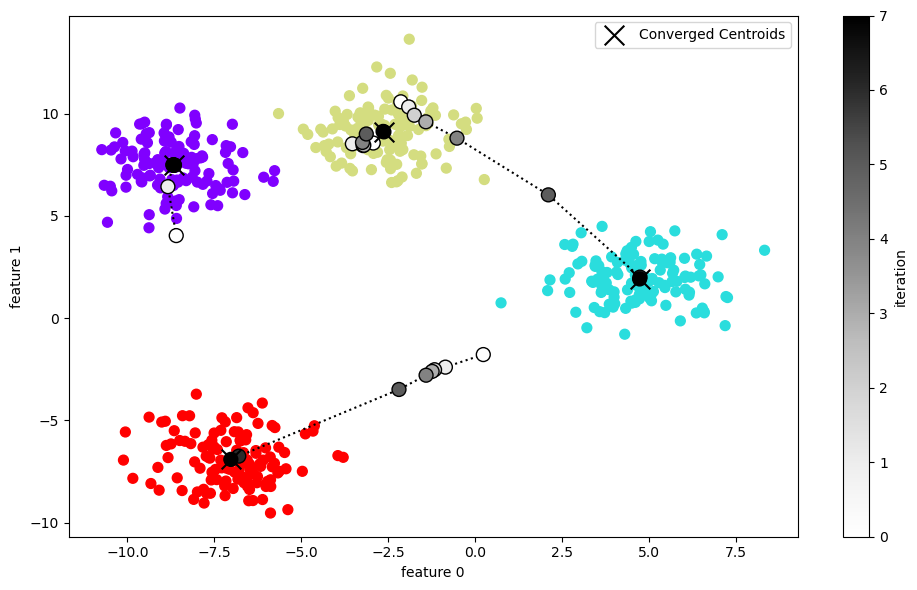

In [5]:
centroids, y_hat, centroids_log = kmeans(X, K, random_state=35)
fig, ax = plot_centroids_evolution(X, y_hat, centroids_log, centroids, K)

In [ ]:
xv, yv = np.meshgrid(np.linspace(*ax.get_xlim(), 120), np.linspace(*ax.get_ylim(), 100))

In [ ]:
mesh_entries = np.hstack((xv.reshape(-1, 1), yv.reshape(-1, 1)))
mesh_entries.shape

(12000, 2)

In [ ]:
distances = np.sqrt(
    ((mesh_entries[:, :, np.newaxis] - centroids.T[np.newaxis, :, :]) ** 2).sum(axis=1)
)
cluster_ids = distances.argmin(axis=1).reshape(xv.shape)

In [ ]:
ax.imshow(
    cluster_ids,
    cmap="rainbow",
    origin="lower",
    interpolation="antialiased",
    aspect="auto",
    alpha=0.25,
    extent=(*ax.get_xlim(), *ax.get_ylim()),
)

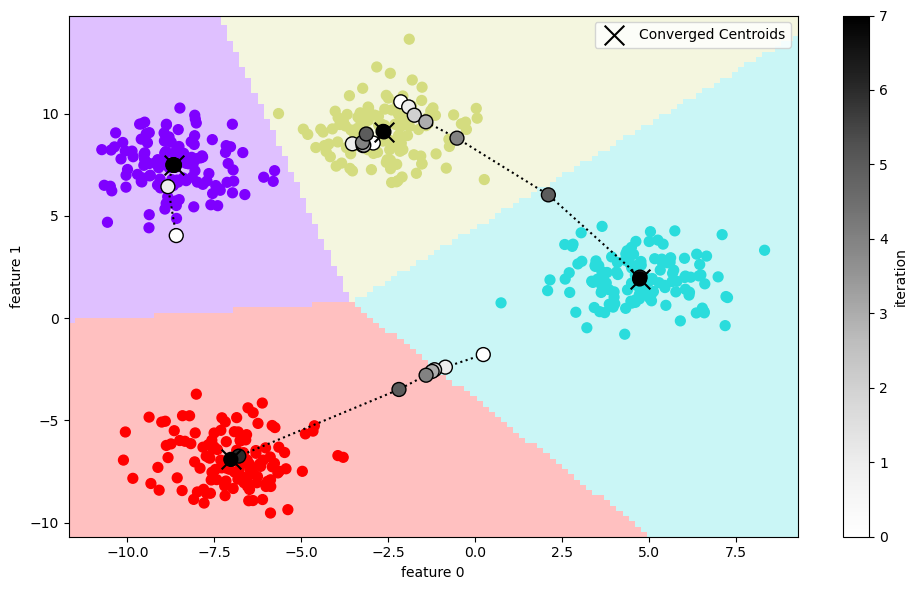

In [10]:
fig